#### Импорт библиотек, загрузка данных 

In [1]:
# импортируем необходмые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
#from tqdm import tqdm
import warnings
!pip install plotly
warnings.filterwarnings('ignore')
#pd.set_option('max_columns', None)
%matplotlib inline 
pd.options.display.float_format= '{:.3f}'.format
%config InlineBackend.figure_format = 'svg' 

In [2]:
calls = pd.read_csv('calls.csv', sep=',')
internet = pd.read_csv('internet.csv', sep=',')
messages = pd.read_csv('messages.csv', sep=',')
tariffs = pd.read_csv('tariffs.csv', sep=',')
users = pd.read_csv('users.csv', sep=',')

* Посмотрим на наши таблицы данных

In [3]:
# Пропусков нет, столбец call_date необходимо привести к формату времени datetime
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000


In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.950,2018-11-25,1000
1,1,1000_1,1052.810,2018-09-07,1000
2,2,1000_2,1197.260,2018-06-25,1000
3,3,1000_3,550.270,2018-08-22,1000
4,4,1000_4,302.560,2018-09-24,1000


In [10]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


#### Предобработка данных

* Рассмотрим таблицу со звонками, посчитаем звонки с нулевой длительностью, их достаточно много - пятая часть данных.

In [13]:
calls.duration.value_counts()

0.000     39613
4.490       142
5.500       142
6.150       141
6.380       141
          ...  
26.940        1
32.190        1
26.320        1
27.410        1
26.900        1
Name: duration, Length: 2871, dtype: int64

In [14]:
# дупликатов нет
calls.duplicated().sum()

0

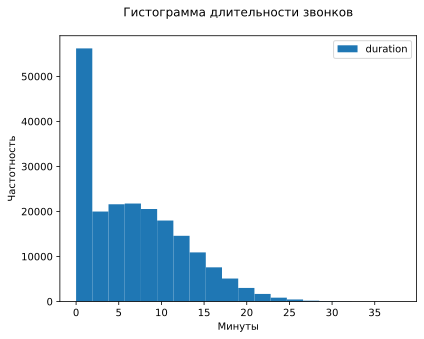

In [15]:
# построим гистограмму длительности звонков
calls.plot(kind='hist', y='duration', bins=20)
plt.title('Гистограмма длительности звонков'+"\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.show()

In [16]:
# заменим 0 на 1 в звонках с нулевой длительностью
calls.loc[calls['duration'] == 0, 'duration'] = 1

In [17]:
# так как оператор всегда округляет значения минут вверх, округлим значения в большую сторону,
# и заменим тип данных на целочисленный
calls.duration=np.ceil(calls.duration).astype('int')

In [18]:
# заменим на формат даты в столбце call_date
calls.call_date=pd.to_datetime(calls.call_date, format='%Y-%m-%d')

In [19]:
# добавим столбец месяц со значениями 1-январь и тд.
calls['month']=calls.call_date.dt.month

In [20]:
# добавим столбец с 
#calls['call_date'] = pd.date_range(start='2018-01', freq='M', periods=12)
#calls['call_date'].month_name()

In [21]:
# убедимся, что все получилось
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [22]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
month        0
dtype: int64

* Рассмотрим таблицу internet

In [23]:
# дупликаты отсутствуют
internet.duplicated().sum()

0

In [24]:
# убедимся,что пропусков нет
internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [25]:
internet.dtypes

Unnamed: 0        int64
id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

In [26]:
# переведем session_date тип данных с object на формат времени
internet.session_date=pd.to_datetime(internet.session_date, format='%Y-%m-%d')

In [27]:
# так как оператор всегда округляет объем интернет-трафика вверх, округлим значения в большую сторону,
# и заменим тип данных на целочисленный
internet.mb_used=np.ceil(internet.mb_used).astype('int')

In [28]:
# добавим столбец месяц со значениями 1-январь и тд.
internet['month']=internet.session_date.dt.month

In [29]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


In [30]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
month           0
dtype: int64

* Теперь рассмотрим информацию о собщениях - таблица messages

In [31]:
# дупликатов нет
messages.duplicated().sum()

0

In [32]:
# пропусков в датасете нет
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [33]:
messages.dtypes

id              object
message_date    object
user_id          int64
dtype: object

In [34]:
# заменим тип данных на формат времени в message_date
messages.message_date=pd.to_datetime(messages.message_date, format='%Y-%m-%d')
messages.message_date

0        2018-06-27
1        2018-10-08
2        2018-08-04
3        2018-06-16
4        2018-12-05
            ...    
123031   2018-12-12
123032   2018-09-28
123033   2018-09-27
123034   2018-11-15
123035   2018-11-16
Name: message_date, Length: 123036, dtype: datetime64[ns]

In [35]:
# добавим столбец месяц со значениями 1-январь и тд.
messages['month']=messages.message_date.dt.month

In [36]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


* Рассмотрим данные о пользователях - таблица users

In [37]:
# дупликатов нет
users.duplicated().sum()

0

In [38]:
# посмотрим на пропуски, есть пропуски в churn_date, 38 пользователей отказались от тарифа
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [39]:
# приведем столбцы с датой к формату времени
users.churn_date=pd.to_datetime(users.churn_date, format='%Y-%m-%d')
users.reg_date=pd.to_datetime(users.reg_date, format='%Y-%m-%d')

In [40]:
# добавим столбец месяц со значениями 1-январь и тд.
users['month_stop']=users.churn_date.dt.month
users['month_start']=users.reg_date.dt.month
users.tail(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start
485,1485,34,NaT,Киров,Таисия,Сухова,2018-12-29,ultra,NaN,12
486,1486,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,NaN,10
487,1487,72,NaT,Кострома,Рудольф,Кириллов,2018-08-13,smart,NaN,8
488,1488,47,NaT,Новороссийск,Вадим,Филатов,2018-11-07,smart,NaN,11
489,1489,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,NaN,8
490,1490,30,NaT,Москва,Радомир,Алесин,2018-04-03,smart,NaN,4
491,1491,56,NaT,Челябинск,Радислав,Андрейкин,2018-04-25,ultra,NaN,4
492,1492,63,NaT,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart,NaN,6
493,1493,71,NaT,Красноярск,Таисия,Ахматулина,2018-11-24,ultra,NaN,11
494,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,NaN,8


In [41]:
users.dtypes

user_id                 int64
age                     int64
churn_date     datetime64[ns]
city                   object
first_name             object
last_name              object
reg_date       datetime64[ns]
tariff                 object
month_stop            float64
month_start             int64
dtype: object

In [42]:
#users.month_stop=users.month_stop.astype('int')
users['month_stop'] = users['month_stop'].astype(pd.Int32Dtype())

In [43]:
users.dtypes

user_id                 int64
age                     int64
churn_date     datetime64[ns]
city                   object
first_name             object
last_name              object
reg_date       datetime64[ns]
tariff                 object
month_stop              Int32
month_start             int64
dtype: object

In [44]:
# посчитаем длительность пользования тарифом
users['duration_of_use']=users['churn_date'] - users['reg_date']
users.tail(25)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,duration_of_use
475,1475,40,NaT,Новокузнецк,Лидия,Фадеева,2018-01-09,smart,<NA>,1,NaT
476,1476,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,<NA>,4,NaT
477,1477,70,NaT,Набережные Челны,Геральд,Серов,2018-04-24,smart,<NA>,4,NaT
478,1478,75,NaT,Грозный,Таира,Константинова,2018-07-16,smart,<NA>,7,NaT
479,1479,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart,<NA>,7,NaT
480,1480,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart,9,2,224 days
481,1481,70,NaT,Москва,Клавдия,Чижова,2018-02-26,smart,<NA>,2,NaT
482,1482,68,NaT,Санкт-Петербург,Алина,Блохина,2018-02-28,smart,<NA>,2,NaT
483,1483,28,NaT,Ульяновск,Серафима,Борисова,2018-04-11,smart,<NA>,4,NaT
484,1484,55,NaT,Екатеринбург,Илзе,Абалдуева,2018-08-04,smart,<NA>,8,NaT


#### Расчеты на каждого пользователя

* Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [45]:
calls=calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=(['count', 'sum'])).reset_index()

In [46]:
calls.columns=['user_id', 'month', 'calls_count', 'calls_sum']

In [47]:
calls.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478


* Посчитаем количество отправленных сообщений по месяцам

In [48]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [49]:
messages=messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count']).reset_index()

In [50]:
messages.columns=['user_id', 'month', 'messages_count']

In [51]:
messages.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


* Посчитаем объем израсходованного интернет-трафика по месяцам

In [52]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


In [53]:
internet=internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum']).reset_index()

In [54]:
internet.columns=['user_id', 'month', 'using_traffic']

In [55]:
internet.head()

,user_id,month,using_traffic
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [56]:
# переведем столбец using_traffic в гигабайты
internet.using_traffic=np.ceil(internet.using_traffic / 1024)

In [57]:
# убедимся, что все получилось
internet.head()

,user_id,month,using_traffic
0,1000,5,3.000
1,1000,6,23.000
2,1000,7,14.000
3,1000,8,14.000
4,1000,9,15.000


##### Посчитаем помесячную выручку с каждого пользователя

In [58]:
calls.columns

Index(['user_id', 'month', 'calls_count', 'calls_sum'], dtype='object')

In [59]:
# приесоединим к звонкам сообщения по столбцам 'user_id', 'month'
revenue=calls.merge(messages, on=['user_id', 'month'], how='outer')
revenue.sample(5)

,user_id,month,calls_count,calls_sum,messages_count
517,1082,10,32.000,307.000,73.000
886,1144,6,71.000,487.000,51.000
85,1011,10,76.000,645.000,17.000
157,1023,12,84.000,574.000,49.000
787,1125,11,56.000,404.000,7.000


In [60]:
len(revenue['user_id'].unique())

498

In [61]:
# посмотрим на пропуски. есть пропуски по количеству звонков, в минутах и количестве сообщений
revenue.isna().sum()

user_id             0
month               0
calls_count        39
calls_sum          39
messages_count    496
dtype: int64

* Заменим пропуски нулями, логично предположить, что абонент не пользовался данной услугой.

In [62]:
revenue['messages_count']=revenue['messages_count'].fillna(0)

In [63]:
revenue['calls_count']=revenue['calls_count'].fillna(0)

In [64]:
revenue['calls_sum']=revenue['calls_sum'].fillna(0)

In [65]:
# присоединим к нашей таблице таблицу интернет
revenue=revenue.merge(internet, on=['user_id', 'month'], how='outer')
revenue

,user_id,month,calls_count,calls_sum,messages_count,using_traffic
0,1000,5,22.000,164.000,22.000,3.000
1,1000,6,43.000,187.000,60.000,23.000
2,1000,7,47.000,346.000,75.000,14.000
3,1000,8,52.000,418.000,81.000,14.000
4,1000,9,58.000,478.000,57.000,15.000
...,...,...,...,...,...,...
3209,1489,9,0.000,0.000,32.000,17.000
3210,1489,10,0.000,0.000,21.000,20.000
3211,1489,11,0.000,0.000,20.000,18.000
3212,1489,12,0.000,0.000,35.000,17.000


In [66]:
len(set(internet['user_id'].unique()) - set(revenue['user_id'].unique()))

0

In [67]:
len(revenue['user_id'].unique())

498

In [68]:
set(users['user_id'].unique()) - set(revenue['user_id'].unique())

{1128, 1371}

In [69]:
users[(users['churn_date'].notnull()) & ((users['user_id'] == 1128) | (users['user_id'] == 1371))]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,duration_of_use
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12,8 days
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12,5 days


In [70]:
users[users['duration_of_use'] < '30 days']

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,duration_of_use
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart,12,11,23 days
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12,12,8 days
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12,12,5 days


In [71]:
revenue.isna().sum()

user_id            0
month              0
calls_count        1
calls_sum          1
messages_count     1
using_traffic     11
dtype: int64

In [72]:
# аналогичная ситуация и с пропусками в столбце использрвание трафика, заменим их нулями
revenue['using_traffic']=revenue['using_traffic'].fillna(0)

In [73]:
# посмотрим на пропуски
revenue.isna().sum()

user_id           0
month             0
calls_count       1
calls_sum         1
messages_count    1
using_traffic     0
dtype: int64

In [74]:
# преобразуем мегабайты в гигабайты в табличке тарифы для удобства расчетов
tariffs['gb_month_inc']=tariffs['mb_per_month_included'] / 1024
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_month_inc
0,50,15360,500,550,200,3,3,smart,15.000
1,1000,30720,3000,1950,150,1,1,ultra,30.000


In [75]:
tariffs['gb_month_inc']=tariffs['gb_month_inc'].astype('int')

In [76]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_month_inc
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


In [77]:
# переименуем столбец tariff_name на tariff для правильного приединения к основной таблице revenue
tariffs=tariffs.rename(columns={'tariff_name':'tariff'})

In [78]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_month_inc
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


In [79]:
# присоединим к нашей таблице сведения о тарифе каждого пользователя и убедимся, что все получилось
revenue=revenue.merge(users[['user_id', 'tariff']], on='user_id', how='left')
revenue

,user_id,month,calls_count,calls_sum,messages_count,using_traffic,tariff
0,1000,5,22.000,164.000,22.000,3.000,ultra
1,1000,6,43.000,187.000,60.000,23.000,ultra
2,1000,7,47.000,346.000,75.000,14.000,ultra
3,1000,8,52.000,418.000,81.000,14.000,ultra
4,1000,9,58.000,478.000,57.000,15.000,ultra
...,...,...,...,...,...,...,...
3209,1489,9,0.000,0.000,32.000,17.000,smart
3210,1489,10,0.000,0.000,21.000,20.000,smart
3211,1489,11,0.000,0.000,20.000,18.000,smart
3212,1489,12,0.000,0.000,35.000,17.000,smart


In [80]:
revenue.isna().sum()

user_id           0
month             0
calls_count       1
calls_sum         1
messages_count    1
using_traffic     0
tariff            0
dtype: int64

In [81]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_month_inc
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


In [82]:
# присоединим таблицу тарифы
revenue=revenue.merge(tariffs, on='tariff', how='right')
revenue

,user_id,month,calls_count,calls_sum,messages_count,using_traffic,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_month_inc
0,1001,11,59.000,444.000,0.000,19.000,smart,50,15360,500,550,200,3,3,15
1,1001,12,63.000,430.000,0.000,14.000,smart,50,15360,500,550,200,3,3,15
2,1002,6,15.000,118.000,4.000,11.000,smart,50,15360,500,550,200,3,3,15
3,1002,7,26.000,219.000,11.000,18.000,smart,50,15360,500,550,200,3,3,15
4,1002,8,42.000,294.000,13.000,20.000,smart,50,15360,500,550,200,3,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1473,9,0.000,0.000,19.000,17.000,ultra,1000,30720,3000,1950,150,1,1,30
3210,1473,10,0.000,0.000,20.000,14.000,ultra,1000,30720,3000,1950,150,1,1,30
3211,1473,11,0.000,0.000,14.000,22.000,ultra,1000,30720,3000,1950,150,1,1,30
3212,1473,12,0.000,0.000,20.000,18.000,ultra,1000,30720,3000,1950,150,1,1,30


In [83]:
print(f'Количество клиентов: {revenue.user_id.nunique()}')

Количество клиентов: 498


In [84]:
# напишем функцию подсчета помесячной выручки с каждого пользователя
def monthly_revenue(row):
    
    calls=row['calls_sum']
    messages=row['messages_count']
    internet=row['using_traffic']
    
# посчитаем перерасход по звонкам, сообщениям и интернету
    
    calls=(row['calls_sum'] - row['minutes_included']) * row['rub_per_minute']
    messages=(row['messages_count'] - row['messages_included']) * row['rub_per_message']
    internet = (row['using_traffic'] - row['gb_month_inc']) * row['rub_per_gb']
    
    over_limit=0
    for x in [calls, messages, internet]:
        if x>0:
            over_limit +=x
    return over_limit

revenue['over_limit']=revenue.apply(monthly_revenue, axis=1)

In [85]:
# теперь прибавим абонентскую плату
revenue['monthly_revenue']=revenue['over_limit'] + revenue['rub_monthly_fee']

In [86]:
# убедимся, что функция написана корректно и считается выручка по каждому пользователю, посмотрим на 10 случайных записей
revenue.sample(10)

,user_id,month,calls_count,calls_sum,messages_count,using_traffic,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_month_inc,over_limit,monthly_revenue
399,1083,12,71.000,471.000,51.000,16.000,smart,50,15360,500,550,200,3,3,15,203.000,753.000
685,1149,9,31.000,248.000,99.000,25.000,smart,50,15360,500,550,200,3,3,15,2147.000,2697.000
1130,1244,10,55.000,391.000,79.000,27.000,smart,50,15360,500,550,200,3,3,15,2487.000,3037.000
3096,1453,11,123.000,996.000,57.000,24.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2621,1243,9,51.000,344.000,82.000,29.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
1878,1425,5,97.000,835.000,75.000,16.000,smart,50,15360,500,550,200,3,3,15,1280.000,1830.000
2702,1281,6,69.000,511.000,40.000,11.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2917,1377,5,160.000,1132.000,16.000,7.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
1270,1280,8,99.000,794.000,42.000,16.000,smart,50,15360,500,550,200,3,3,15,1082.000,1632.000
1126,1244,6,62.000,393.000,77.000,16.000,smart,50,15360,500,550,200,3,3,15,281.000,831.000


In [87]:
revenue.isna().sum()

user_id                  0
month                    0
calls_count              1
calls_sum                1
messages_count           1
using_traffic            0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
gb_month_inc             0
over_limit               0
monthly_revenue          0
dtype: int64

* Предобработка закончена. Приступаем к анализу данных.

#### EDA

##### Анализ звонков

##### Среднее количество звонков по двум тарифам

In [88]:
# посчитаем среднюю длительность телефонных звонков и посмотрим на основные показатели по тарифам
revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,397.374,510.082
std,74.271,79.206
min,209.647,304.667
25%,393.053,489.016
50%,412.995,524.718
75%,438.742,556.929
max,491.418,609.129


In [89]:
revenue.sample(10)

,user_id,month,calls_count,calls_sum,messages_count,using_traffic,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_month_inc,over_limit,monthly_revenue
2478,1151,9,55.000,387.000,5.000,3.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
3124,1466,3,68.000,427.000,0.000,21.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2419,1104,7,52.000,389.000,91.000,17.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
719,1157,10,60.000,428.000,0.000,27.000,smart,50,15360,500,550,200,3,3,15,2400.000,2950.000
3121,1463,11,41.000,264.000,11.000,9.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2786,1330,9,92.000,741.000,81.000,29.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
845,1179,9,72.000,565.000,0.000,12.000,smart,50,15360,500,550,200,3,3,15,195.000,745.000
2164,1484,8,40.000,351.000,91.000,12.000,smart,50,15360,500,550,200,3,3,15,123.000,673.000
1760,1400,12,79.000,622.000,59.000,22.000,smart,50,15360,500,550,200,3,3,15,1793.000,2343.000
2859,1356,7,114.000,871.000,144.000,30.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000


In [90]:
revenue.query('tariff=="ultra"').sample(10)

,user_id,month,calls_count,calls_sum,messages_count,using_traffic,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_month_inc,over_limit,monthly_revenue
3170,1491,10,90.000,604.000,61.000,24.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2833,1346,10,100.000,739.000,49.000,6.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2689,1276,11,60.000,455.000,20.000,29.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2580,1208,8,77.000,509.000,0.000,19.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2509,1168,3,160.000,1120.000,54.000,33.000,ultra,1000,30720,3000,1950,150,1,1,30,450.000,2400.000
2389,1096,5,45.000,312.000,81.000,7.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2816,1341,11,159.000,1240.000,71.000,31.000,ultra,1000,30720,3000,1950,150,1,1,30,150.000,2100.000
3169,1491,9,77.000,550.000,52.000,15.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
2764,1318,5,91.000,622.000,49.000,27.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000
3085,1452,12,31.000,244.000,54.000,21.000,ultra,1000,30720,3000,1950,150,1,1,30,0.000,1950.000


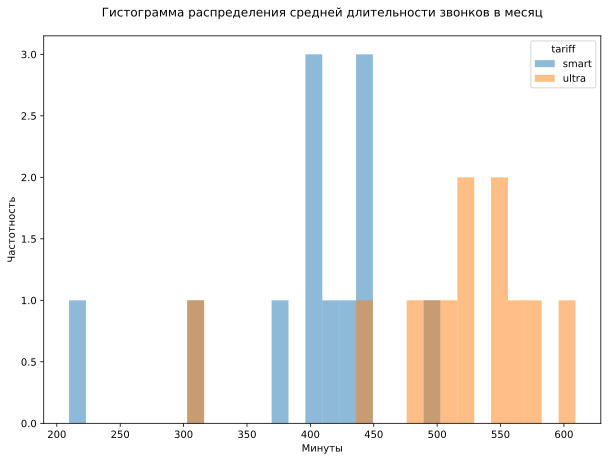

In [91]:
# построим гистограмму распределения средней длительности звонков в месяц по двум тарифам
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean')
 .T
 .plot(kind='hist', alpha=0.5, figsize=(10,7), bins=30)
)
plt.title('Гистограмма распределения средней длительности звонков в месяц'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
#plt.figure(figsize=(10,7))
plt.show()

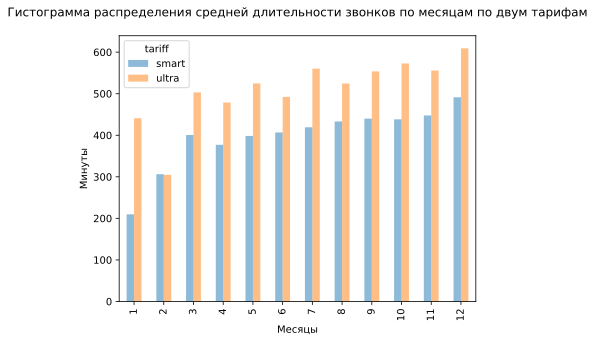

In [92]:
# посмотрим на распределение средней длительности звонков по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения средней длительности звонков по месяцам по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Минуты')
plt.show()

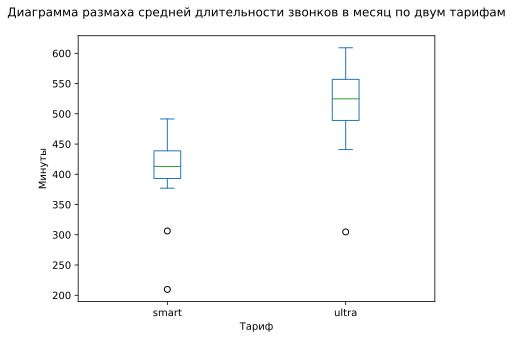

In [93]:
# построим диаграмму размаха средней длительности звонков в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха средней длительности звонков в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Минуты')
plt.show()

##### Вывод

По первой гистограмме видно, что тарифы имеют пересечение в районе 450 минут, в райне 300 и 500 минут продолжительность по обоим тарифам у абонентов совпадает.Второй график показывает нам что, в среднем абоненты тарифа смарт разговаривают в месяц в районе 400 минут в месяц, то есть не выбирают свой лимит в 500 минут. Абоненты тарифа ультра не выбирают свой лимит 3000 минут, тратят на разговоры в среднем 500 минут в месяц. В целом, абоненты тарифа смарт увеличивают длительность своих разговоров в течение года, абоненты тарифа ультра не показывают такой линейной зависимости, исключение для обоих тарифов - месяц февраль - абоненты тратят идинаковое количество минут. Диаграмма размаха подтверждает выводы предыдущих графиков, ящики имею некое пересечение в районе 450 минут.

##### Стандартное отклонение длительности звонков

In [94]:
# посмотрим на стандартное отклонение длительности звонков по нашим тарифам
revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,187.707,314.712
std,11.180,24.551
min,158.869,269.151
25%,183.649,302.559
50%,190.814,316.960
75%,193.115,333.407
max,203.598,351.612


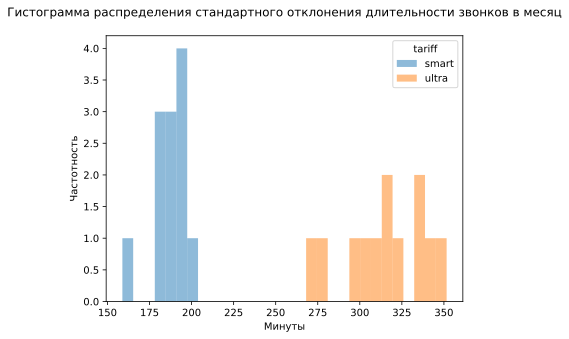

In [95]:
# построим гистограмму распределения стнадартного отклонения длительности звонков по двум тарифам в месяц
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения длительности звонков в месяц'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.show()

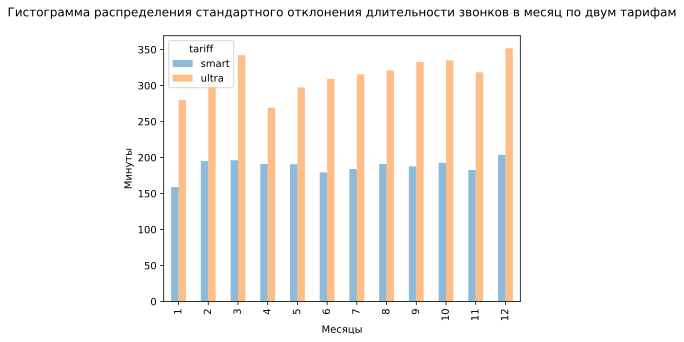

In [96]:
# посмотрим на распределение стандартного отклонения длительности звонков по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения стандартного отклонения длительности звонков в месяц по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Минуты')
plt.show()

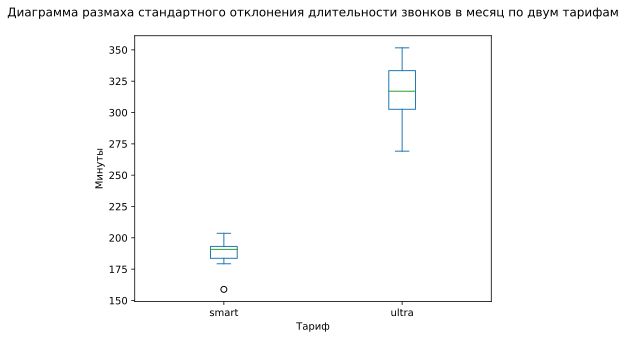

In [97]:
# построим диаграмму размаха стандартного отклонения длительности звонков в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха стандартного отклонения длительности звонков в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Минуты')
plt.show()

##### Вывод

По графику значения тарифов не пересекаются, видно, что тарифы отличаются друг от друга. Можно сказать, что стандартное отклонение у тарифа ультра намного выше, чем у тарифа смарт. Пользователи тарифа ультра не стабильны в использовании тарифа. Ящики тарифов не пересекаются между собой. 

##### Дисперсия длительности звонков

In [98]:
# посмотрим на дисперсию длительности звонков по нашим тарифам
revenue.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,35348.459,99596.335
std,4042.187,15253.592
min,25239.387,72442.025
25%,33727.471,91550.991
50%,36409.828,100465.276
75%,37294.745,111160.842
max,41452.036,123630.795


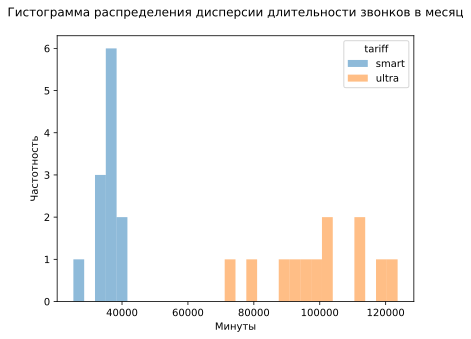

In [99]:
# построим гистограмму распределения дисперсий длительности звонков по двум тарифам в месяц
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии длительности звонков в месяц'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.show()

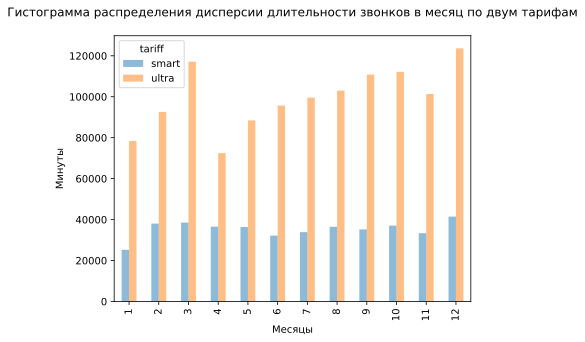

In [100]:
# посмотрим на распределение дисперсии длительности звонков по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения дисперсии длительности звонков в месяц по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Минуты')
plt.show()

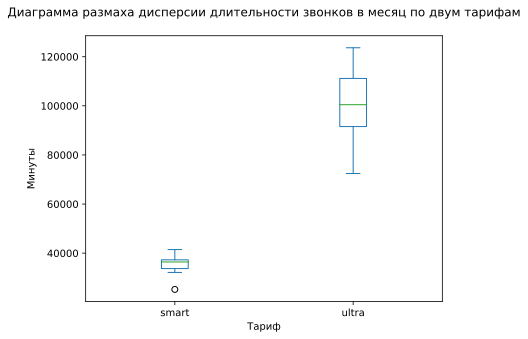

In [101]:
# построим диаграмму размаха дисперсии длительности звонков в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='var')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха дисперсии длительности звонков в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Минуты')
plt.show()

##### Вывод

По величине дисперсии можно судить об устойчисвости значений переменных. В нашем случае дисперсия средней продолжительности разговоров по тарифу ультра имеет высокие показатели, в отличие от тарифа смарт, можно предположить о наличии некоторых шумов и аномалий в значениях тарифа ультра.

#### Анализ количества сообщений

##### Среднее количество сообщений

In [102]:
# посчитаем среднее количество сообщений и посмотрим на основные показатели по тарифам
revenue.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,31.413,43.764
std,5.103,12.269
min,18.235,21.958
25%,31.578,33.408
50%,33.638,45.083
75%,33.767,53.163
max,35.994,60.612


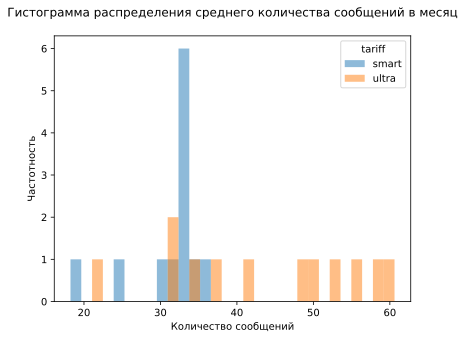

In [103]:
# построим гистограмму распределения среднего количества сообщений в месяц по двум тарифам
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения среднего количества сообщений в месяц'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.show()

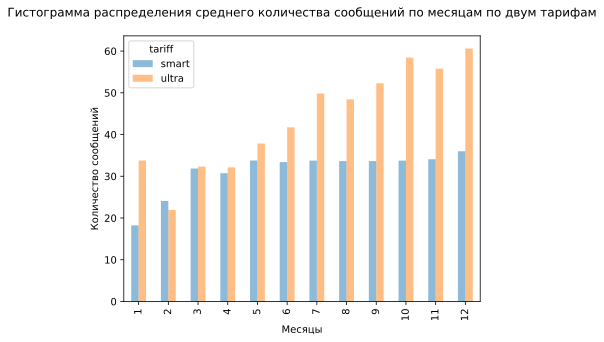

In [104]:
# посмотрим на распределение среднего количества сообщений по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения среднего количества сообщений по месяцам по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Количество сообщений')
plt.show()

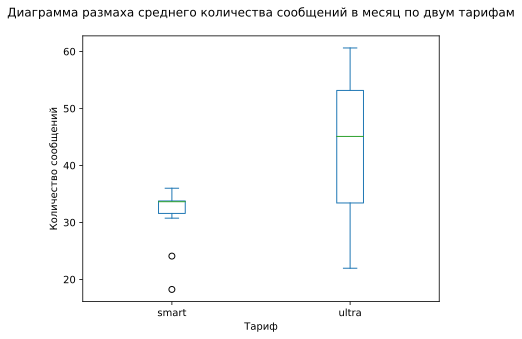

In [105]:
# построим диаграмму размаха среднего количества сообщений в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего количества сообщений в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')
plt.show()

##### Вывод

В среднем абоненты тарифа ультра отправляют сообщения больше, чем абоненты тарифа смарт. В течение года поведение абонентов тарифа смарт достаточно стабильно, по тарифу ультра видно положительную динамику.

##### Стандартное отклонение количества сообщений

In [106]:
# посмотрим на стандартное отклонение количества сообщений по нашим тарифам
revenue.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,26.468,43.062
std,3.964,8.067
min,16.198,26.774
25%,26.238,39.633
50%,28.200,45.483
75%,28.445,48.970
max,30.577,51.934


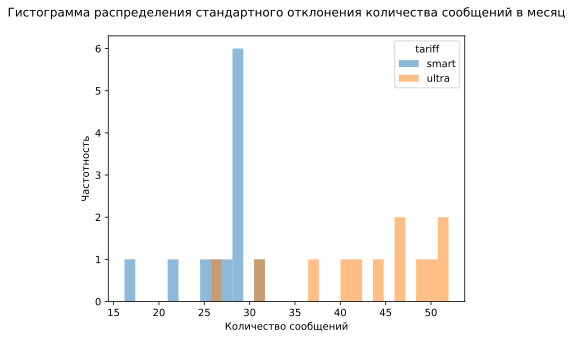

In [107]:
# построим гистограмму распределения стнадартного отклонения количества сообщений по двум тарифам в месяц
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения количества сообщений в месяц'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.show()

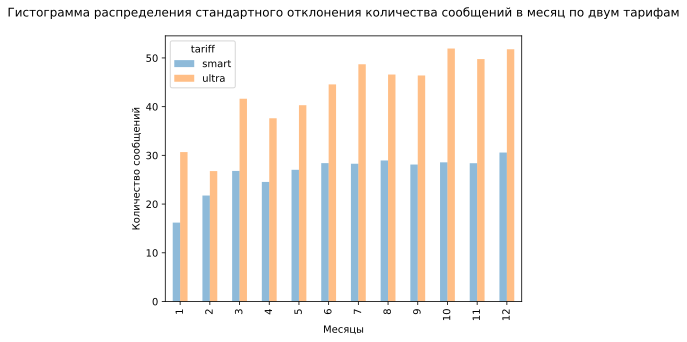

In [108]:
# посмотрим на распределение стандартного отклонения количества сообщений по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения стандартного отклонения количества сообщений в месяц по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Количество сообщений')
plt.show()

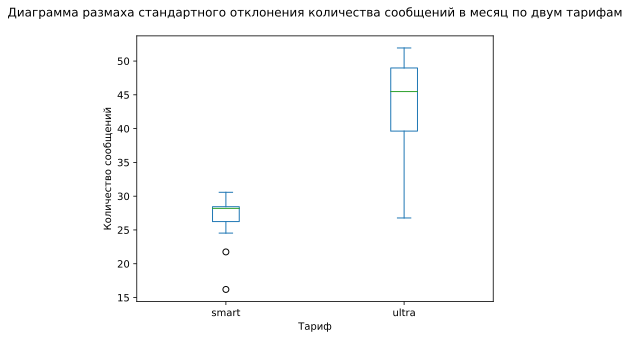

In [109]:
# построим диаграмму размаха стандартного отклонения количества сообщений в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха стандартного отклонения количества сообщений в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')
plt.show()

##### Вывод

Графики показывают нам, что стандартное отклонение сообщений у абонентов тарифа ультра выше, чем по тарифу смарт, пользователи тарифа ультра проявляют нестабильную активность по сравнению с абонентами смарта.

##### Дисперсия количества сообщений

In [110]:
# посмотрим на дисперсию количества сообщений по нашим тарифам
revenue.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='var').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,714.972,1914.024
std,185.819,647.032
min,262.367,716.824
25%,689.404,1572.157
50%,795.253,2069.577
75%,809.133,2398.269
max,934.952,2697.182


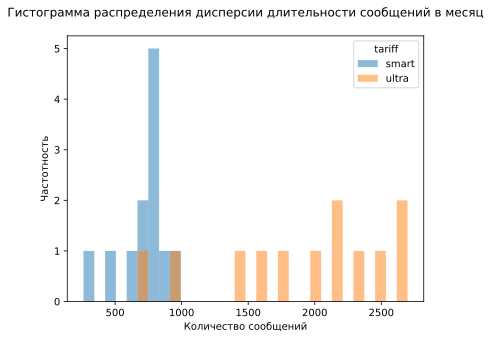

In [111]:
# построим гистограмму распределения дисперсий количества сообщений по двум тарифам в месяц
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии длительности сообщений в месяц'+ "\n")
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.show()

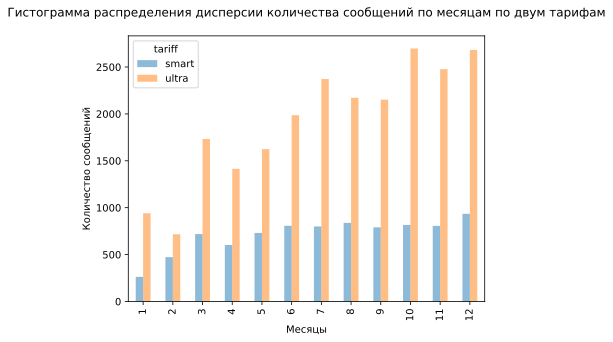

In [112]:
# посмотрим на распределение дисперсии количества сообщений по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='var')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения дисперсии количества сообщений по месяцам по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Количество сообщений')
plt.show()

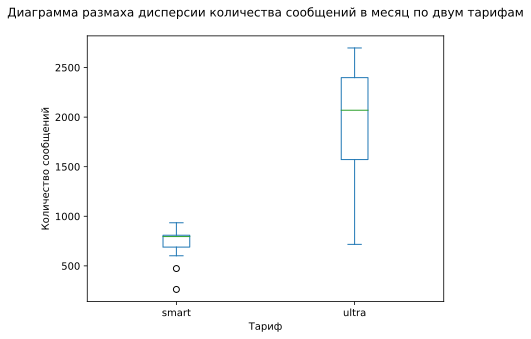

In [113]:
# построим диаграмму размаха дисперсии количества сообщений в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='var')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха дисперсии количества сообщений в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Количество сообщений')
plt.show()

#### Вывод

В целом, дисперсия сообщений по тарифу ультра выше, чем по тарифу смарт - это аналогичная ситуация со звонками.

##### Анализ объема интернет-трафика

##### Среднее значение объема интернет-трафика по двум тарифам

In [114]:
# посчитаем среднее значение объема интернет-трафика и посмотрим на основные показатели по тарифам
revenue.pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='mean').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,15.224,18.297
std,2.639,2.916
min,8.735,12.000
25%,14.846,17.527
50%,15.962,19.343
75%,16.815,19.894
max,18.234,21.784


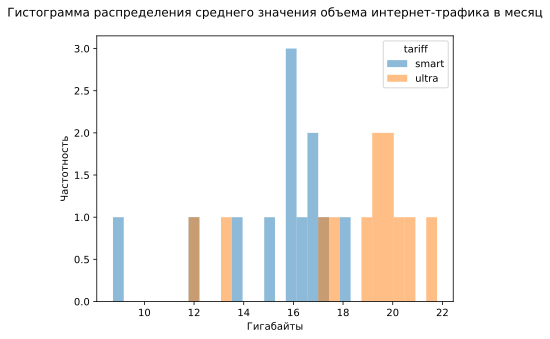

In [115]:
# построим гистограмму распределения среднего значения объема интернет-трафика в месяц по двум тарифам
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='mean')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения среднего значения объема интернет-трафика в месяц'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')
plt.show()

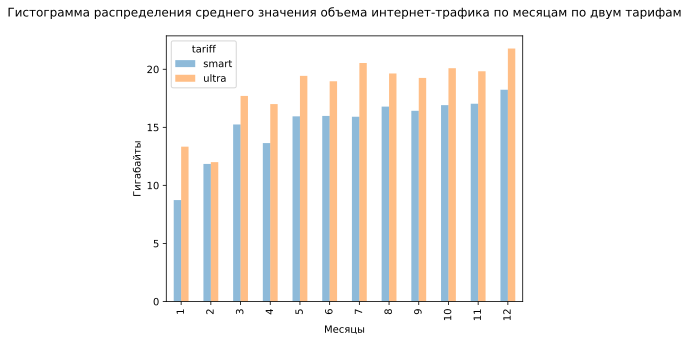

In [116]:
# посмотрим на распределение среднего значения объема интернет-трафика по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='mean')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения среднего значения объема интернет-трафика по месяцам по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Гигабайты')
plt.show()

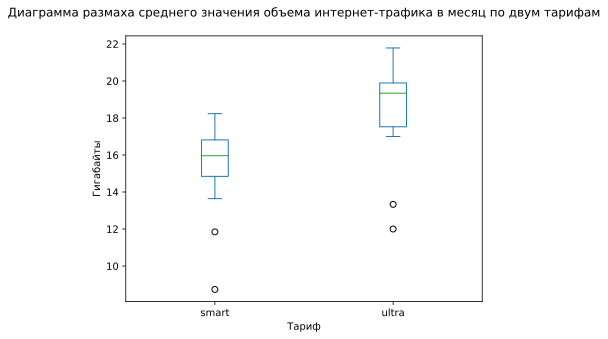

In [117]:
# построим диаграмму размаха среднего значения объема интернет-трафика в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха среднего значения объема интернет-трафика в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Гигабайты')
plt.show()

##### Вывод

Средний объем трафика по тарифам имеет пересечение, в течение года абоненты тарифа смарт увеличивают объем пользования интернетом, абоненты тарифа ультра показывают разную динамику в течение года. В обоих тарифах самы низкий показатель в феврале - примерно 12 минут в среднем пользуются мобильным интернетом в обоих тарифах.

##### Стандартное отклонение объема интернет-трафика по двум тарифам

In [118]:
# посмотрим на стандартное отклонение объема интернет-трафика по нашим тарифам
revenue.pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='std').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,5.670,9.596
std,0.335,1.009
min,5.103,6.782
25%,5.489,9.401
50%,5.684,9.771
75%,5.813,10.178
max,6.278,10.744


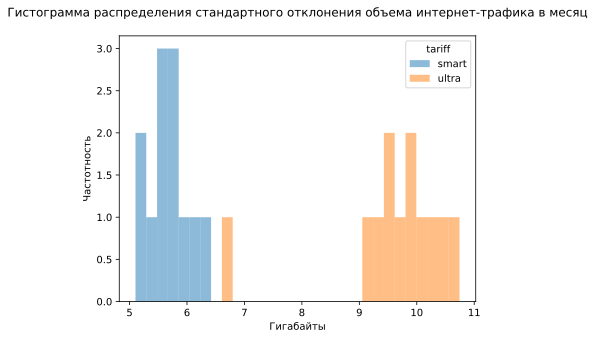

In [119]:
# построим гистограмму распределения стнадартного отклонения объема интернет-трафика по двум тарифам в месяц
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения стандартного отклонения объема интернет-трафика в месяц'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')
plt.show()

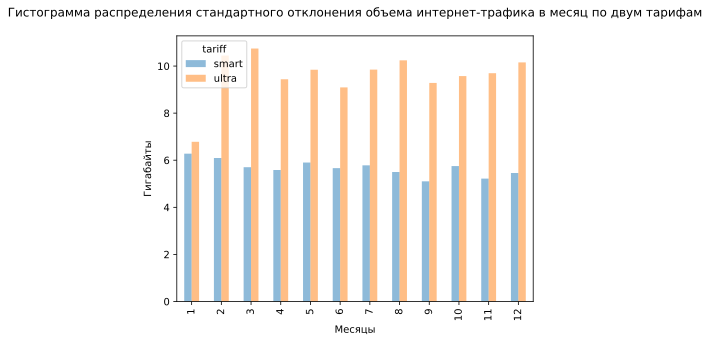

In [120]:
# посмотрим на распределение стандартного отклонения объема интернет-трафика по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='std')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения стандартного отклонения объема интернет-трафика в месяц по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Гигабайты')
plt.show()

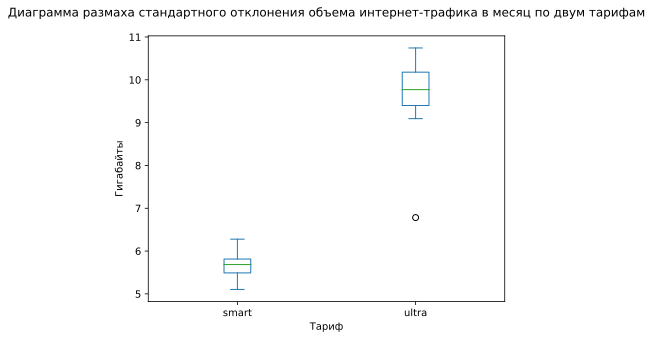

In [121]:
# построим диаграмму размаха стандартного отклонения объема интернет-трафика в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='std')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха стандартного отклонения объема интернет-трафика в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Гигабайты')
plt.show()

##### Вывод

В течение года пользователи тарифа смарт уменьшают пользование интернетом, а вот пользователи тарифа ультра чуствуют себя свободнее.

##### Дисперсия объема интернет-трафика по двум тарифам

In [122]:
# посмотрим на дисперсию объема интернет-трафика по нашим тарифам
revenue.pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='var').T.describe()

tariff,smart,ultra
count,12.000,12.000
mean,32.254,93.022
std,3.803,17.634
min,26.044,46.000
25%,30.134,88.381
50%,32.305,95.469
75%,33.795,103.600
max,39.413,115.437


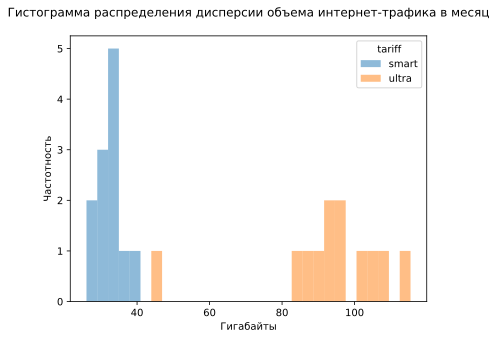

In [123]:
# построим гистограмму распределения дисперсий объема интернет-трафика по двум тарифам в месяц
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='var')
 .T
 .plot(kind='hist', alpha=0.5, bins=30)
)
plt.title('Гистограмма распределения дисперсии объема интернет-трафика в месяц'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')
plt.show()

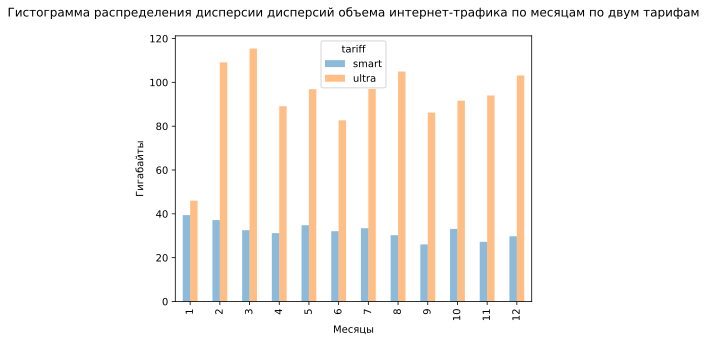

In [124]:
# посмотрим на распределение дисперсии объема интернет-трафика по месяцам
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='var')
 .T
 .plot(kind='bar', alpha=0.5)
)
plt.title('Гистограмма распределения дисперсии дисперсий объема интернет-трафика по месяцам по двум тарифам'+ "\n")
plt.xlabel('Месяцы')
plt.ylabel('Гигабайты')
plt.show()

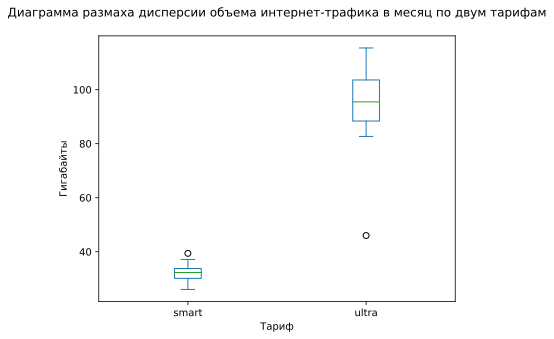

In [125]:
# построим диаграмму размаха дисперсии объема интернет-трафика в месяц по двум тарифам 
(revenue.
 pivot_table(index='tariff', columns='month', values='using_traffic', aggfunc='var')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха дисперсии объема интернет-трафика в месяц по двум тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Гигабайты')
plt.show()

#####  Вывод

Дисперсия объема интернет-трафика тарифа ультра намного выше, чем у тарифа смарт. Можно сказать, что дисперсия трафика по тарифу смарт приближена к нормальному распределению.

##### Анализ средней выручки

In [126]:
# создадим сводную таблицу со столбцами user_id и новым столбцом monthly_revenue_per_user
mean_revenue_per_user=revenue.pivot_table(index='user_id', values='monthly_revenue', aggfunc='mean').reset_index()
mean_revenue_per_user.columns=['user_id', 'monthly_revenue_per_user']
mean_revenue_per_user.head()

,user_id,monthly_revenue_per_user
0,1000,1950.000
1,1001,950.000
2,1002,1035.714
3,1003,1950.000
4,1004,1950.000


In [127]:
# теперь присоединим к нашей таблице данные о городе абонента 
revenue=revenue.merge(users[['user_id', 'city']], on='user_id', how='left')

In [128]:
# затем к таблице users присоединим данные о выручке с каждого абонента из сводной таблицы
users=users.merge(mean_revenue_per_user, on='user_id', how='left')

In [129]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_stop,month_start,duration_of_use,monthly_revenue_per_user
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,<NA>,5,NaT,1950.000
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,<NA>,11,NaT,950.000
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,<NA>,6,NaT,1035.714
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,<NA>,8,NaT,1950.000
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,<NA>,5,NaT,1950.000


In [130]:
import seaborn as sns

In [131]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 15, 4 
#plt.figure(figsize=(15, 4), dpi=300)

In [132]:
# посмотрим на среднюю выручку от пользователей тарифа смарт, создадим сводную таблицу по нашему тарифу по месяцам
monthly_overpayment_smart = revenue.query('tariff=="smart"').pivot_table(index='month', 
                        values=['monthly_revenue'],
                        aggfunc='median')
months = ['Январь', 'Февраль', 'Март', 'Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь', 'Ноябрь','Декабрь']
monthly_overpayment_smart['months'] = months

In [133]:
monthly_overpayment_smart

,monthly_revenue,months
month,,
1,550.000,Январь
2,550.000,Февраль
3,928.000,Март
4,667.000,Апрель
5,1028.000,Май
6,950.000,Июнь
7,1007.000,Июль
8,1150.000,Август
9,980.000,Сентябрь


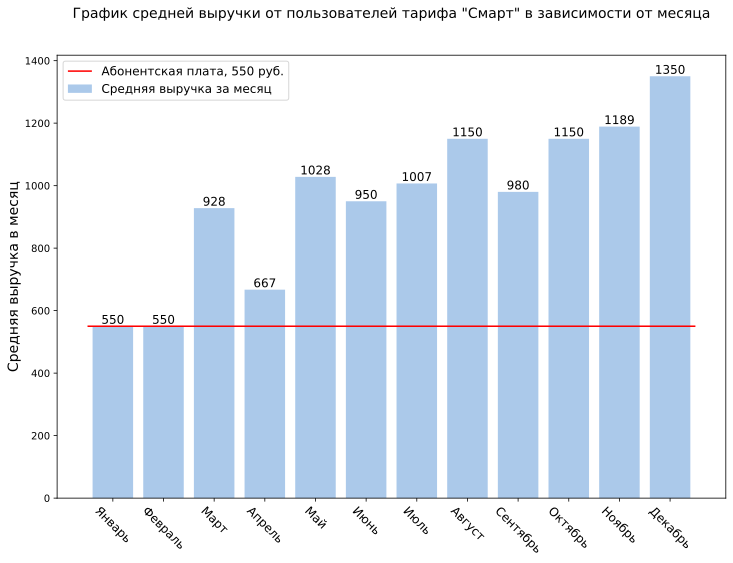

In [134]:
# построим график средней выручки по тарифу смарт
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

sns.set_color_codes('pastel')
splot = sns.barplot(x='months', y='monthly_revenue', data=monthly_overpayment_smart, color='b', label='Средняя выручка за месяц')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom',
                  fontsize=12)


ax.hlines(550, -0.5, 11.5, color='red', label='Абонентская плата, 550 руб.')

plt.title('График средней выручки от пользователей тарифа "Смарт" в зависимости от месяца\n\n', fontsize=(14))
plt.ylabel('Средняя выручка в месяц',fontsize=(14))
plt.xticks(rotation=-45, fontsize=12)
ax.legend(fontsize=12)
plt.xlabel('')
print('')
plt.show()

##### Вывод

Мы видим, что выручка росла в течение года, в декабре пользователи в среднем платили 1350 рублей в месяц, что говорит нам о том, что абонентам не хватало лимита.

In [135]:
# посмотрим на выручку от пользователей тарифа ультра, создадим сводную таблицу по месяцам
monthly_overpayment_ultra = revenue.query('tariff=="ultra"').pivot_table(index='month', 
                        values=['monthly_revenue'], aggfunc='mean')
months = ['Январь', 'Февраль', 'Март', 'Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь', 'Ноябрь','Декабрь']
monthly_overpayment_ultra['months'] = months

In [136]:
monthly_overpayment_ultra 

,monthly_revenue,months
month,,
1,1950.000,Январь
2,1975.000,Февраль
3,2014.865,Март
4,2001.818,Апрель
5,2061.940,Май
6,2041.071,Июнь
7,2121.429,Июль
8,2083.178,Август
9,2024.348,Сентябрь


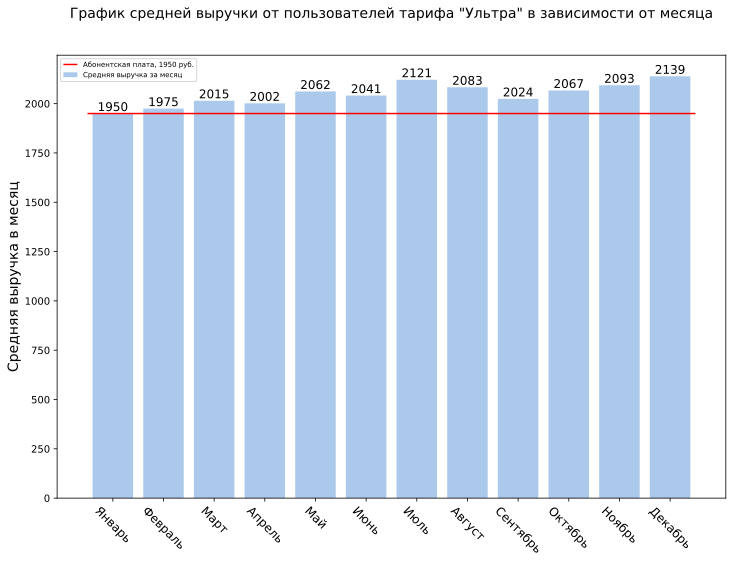

In [137]:
# построим график средней выручки от пользователей ультра
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

sns.set_color_codes('pastel')
splot = sns.barplot(x='months', y='monthly_revenue', data=monthly_overpayment_ultra, color='b', label='Средняя выручка за месяц')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom',
                  fontsize=12)


ax.hlines(1950, -0.5, 11.5, color='red', label='Абонентская плата, 1950 руб.')

plt.title('График средней выручки от пользователей тарифа "Ультра" в зависимости от месяца\n\n', fontsize=(14))
plt.ylabel('Средняя выручка в месяц',fontsize=(14))
plt.xticks(rotation=-45, fontsize=12)
ax.legend(fontsize=7)
plt.xlabel('')
print('')
plt.show()

##### Вывод

По графику видно, что пользователи тоже немного переплачивали за тариф. В среднем примерно в районе 100 рублей за тариф.

In [138]:
# посмотрим на суммарную годовую выручку по тарифам, пересчитаем сразу в милионы рублей для наглядности
revenue.pivot_table(index='tariff', values='monthly_revenue', aggfunc='sum') /1000

,monthly_revenue
tariff,
smart,2923.590
ultra,2040.000


In [139]:
# узнаем количество абонентов тарифа смарт
len(users.query('tariff=="smart"'))

351

In [140]:
# узнаем количество абонентов тарифа ультра
len(users.query('tariff=="ultra"'))

149

##### Вывод

Если смотреть на суммарную выручку, тариф смарт составил 2,9 млн рублей в год и принес больше денег по сравнению с тарифом ультра - 2,04 млн. рублей, но количество абонентов по тарифам неодинаково, и мы пока не можем сказать, что тариф смарт выгоднее оператору.

#### Проверка гипотез

1. H0 - средние выручки от тарифов равны, 
   H1 - средние выручки отличаются.

In [141]:
# создадим сводную таблицу по тарифу смарт
smart = revenue.query('tariff=="smart"')['monthly_revenue']

In [142]:
# создадим сводную таблицу по тарифу ультра
ultra = revenue.query('tariff=="ultra"')['monthly_revenue']

In [143]:
results = st.ttest_ind(smart, ultra) 
alpha=0.05
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8236591828898301e-149
Отвергаем нулевую гипотезу


In [144]:
revenue.pivot_table(index='tariff', values='monthly_revenue', aggfunc='mean')

,monthly_revenue
tariff,
smart,1311.615
ultra,2071.066


Действительно, мы видим, что выручка по тарифу ультра выше выручки по смарту, это позволяет нам с уверенностью сказать, что средние выручки отличются.

2. H0 - средняя выручка от пользователей из г. Москва равна средней выручке пользователей других городов, 
   H1  - средние выручки отличаются

In [145]:
# создадим сводную таблицу по городу Москва
moscow = revenue.query('city == "Москва"')['monthly_revenue']

In [146]:
# создадим сводную таблицу по друним городам
others = revenue.query('city != "Москва"')['monthly_revenue']

In [147]:
results = st.ttest_ind(moscow, others)
alpha=0.05
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5794098792001432
Не получилось отвергнуть нулевую гипотезу


In [148]:
cities = revenue.copy()
cities.loc[cities.loc[:,'city'] != 'Москва', 'city'] = 'Другой город'

In [149]:
cities.pivot_table(index='city', values='monthly_revenue', aggfunc='mean')

,monthly_revenue
city,
Другой город,1540.562
Москва,1560.566


Результаты сводной таблицы подтверждают результаты проведенного теста, средние выручки Москвы и остальных городов отличаются, хоть и незначительно. 

#### Общий вывод по проекту

Проведенный анализ показывает нам, что в среднем абоненты тарифа ультра чувствуют себя более свободно: больше пользуются звонками, сообщениями и интернетом в рамках тарифа, незначительно переплачивая. Абоненты тарифа смарт, напротив, им приходится доплачивать за услуги, к концу года практически в 2 раза (что видно из графиков).
Анализ средней выручки показывает, что выручка по тарифу ультра от одного пользователя выше выручки по тарифу смарт от одного пользователя, однако суммарная выручка приносит больше денег компании-оператору. Анализируя поведение абонентов по обоим тарифам, можно сказать, что если мобильный оператор привлечет больше пользователей к тарифу ультра, то ультра - наиболее предпочтительный тариф для инвестиций. Однако, очевидно, что тариф смарт - более популярный среди абонентов, им пользуются больше людей, также основное увеличение выручки произошло из-за превышения лимита по объему интернет-трафика. Полагаю, что тариф смарт наиболее предпочтительный для увеличения рекламного бюджета.